In [29]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
# Load dataset
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

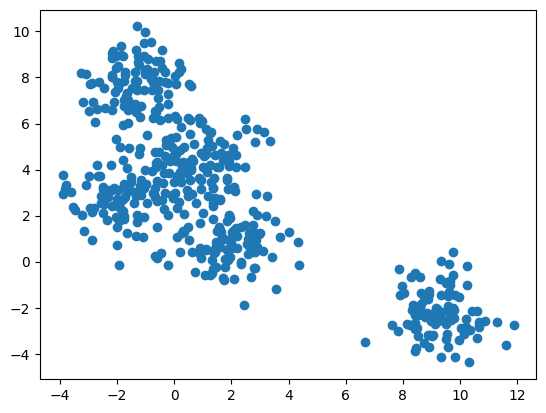

In [31]:
plt.scatter(X, Y)

In [32]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [33]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    return np.sqrt((P2.x - P1.x)**2 + (P2.y - P1.y)**2)

def Mean(AP):
    x_mean = np.mean([centroid.x for centroid in AP])
    y_mean = np.mean([centroid.y for centroid in AP])
    return Point(x_mean, y_mean)

In [34]:
def MinPoint(P, AP):
    minDistance = Distance(P, AP[0])
    minDistanceCluster = 0
    for index, centroid in enumerate(AP):
        distance = Distance(P, centroid)
        if distance < minDistance:
            minDistance = distance
            minDistanceCluster = index
    return minDistanceCluster

In [35]:
def equality(A1, A2):
    return A1 == A2

In [36]:
def kMeans(X, Y, k):
    PointsList = [Point(x1, y1) for x1, y1 in zip(X, Y)]
    kMi = random.sample(PointsList, k)
    kM = kMi.copy()
    D = {i: [] for i in range(k)}
    D_previous = None

    while not equality(D, D_previous):
        D_previous = {i: list(D[i]) for i in D}
        D = {i: [] for i in range(k)}

        for point in PointsList:
            nearestCluster = MinPoint(point, kM)
            D[nearestCluster].append(point)

        for index in D:
            kM[index] = Mean(D[index])

    return [kM, kMi, D]

In [51]:
def ssd_Calc(kM, D):
    ssd = 0
    for index, centroid in enumerate(kM):
        for point in D[index]:
            ssd += Distance(centroid, point)
    return ssd / len(kM)

def Elbow(X, Y):
    max_k = 10
    ssd = []
    for i in range(1, max_k + 1):
        kM, kMi, D = kMeans(X, Y, i)
        ssd.append(ssd_Calc(kM, D))
    plt.plot(np.arange(1, max_k + 1), ssd, color='blue')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squared Distances")
    plt.grid(True)
    plt.show()

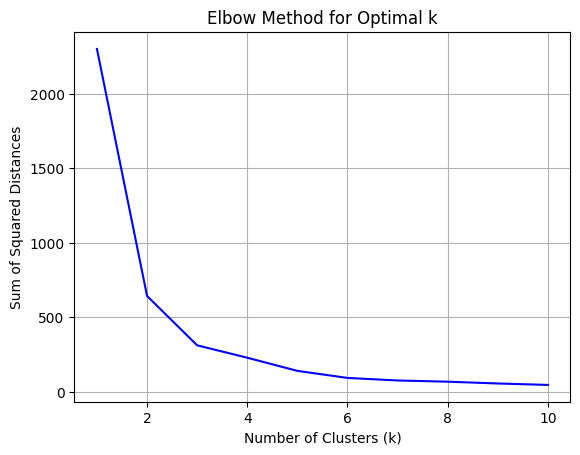

In [52]:
### Here, plot the elbow curve
Elbow(X, Y)

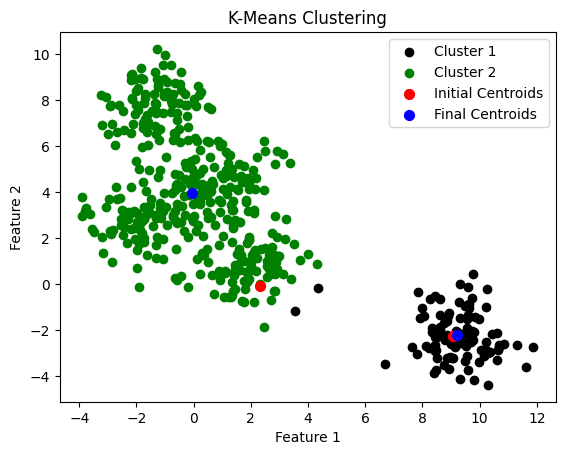

In [48]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
# Perform k-means clustering with k=2
kM, kMi, D = kMeans(X, Y, k=2)

# Separate the points into their respective clusters
X_0 = [point.x for point in D[0]]
Y_0 = [point.y for point in D[0]]

X_1 = [point.x for point in D[1]]
Y_1 = [point.y for point in D[1]]

# Plot the clusters and centroids
plt.scatter(X_0, Y_0, color='black', label='Cluster 1')
plt.scatter(X_1, Y_1, color='green',  label='Cluster 2')

# Plot initial and final centroids
plt.scatter([kMi[0].x, kMi[1].x], [kMi[0].y, kMi[1].y], color='red', marker='o', s=50, label='Initial Centroids')
plt.scatter([kM[0].x, kM[1].x], [kM[0].y, kM[1].y], color='blue', marker='o', s=50, label='Final Centroids')

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()